In [1]:
from eda_imports import *

\# consistent with the summary here: http://seqanswers.com/forums/showthread.php?t=42911

It took me a while to get my head around this, since the column names in the rsem.genes/isoforms.results files don't match the default output of RSEM, neither the version they claim to have used nor the most current version.

The (first) RSEM paper explains that the program calculates two values. One represent the (estimated) number of reads that aligned to a transcript. This value is not an integer because RSEM only reports a guess of how many ambiguously mapping reads belong to a transcript/gene. This number is what the TCGA slightly misleadingly calls raw counts.

The scaled estimate value on the other hand is the estimated frequency of the gene/transcript amongst the total number of transcripts that were sequenced. Newer versions of RSEM call this value (multiplied by 1e6) TPM - Transcripts Per Million. It's closely related to FPKM, as explained on the RSEM website. The important point is that TPM, like FPKM, is independent of transcript length, whereas "raw" counts are not!

The *.normalized_results files on the other hand just contain a scaled version of the raw_counts column. The values are divided by the 75-percentile and multiplied by 1000. This should make the values a bit more comparable between experiments. The Perl code for this quantile normalisation can be found here.

In conclusion, I would strongly recommend using the TPM/scaled_estimate values for all intents and purposes. It seems to me to be the more robust and mathematically sound value.

Hope that helps, best wishes,

Benjamin

In [2]:
# seems that pandas automatically appends .1/.2 to column names when multiple columns have the same name
df_unnormed = pd.read_csv('data/gdac.broadinstitute.org_KICH.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.Level_3.2016012800.0.0/KICH.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes__data.data.txt',
                  low_memory=False,
                  sep='\t')

In [3]:
# df_unnormed.drop(0, inplace=True)  # remove the row with all "raw_count" text
df_unnormed.set_index(df_unnormed['Hybridization REF'].values, inplace=True)
df_unnormed.drop('Hybridization REF', axis=1, inplace=True)

In [4]:
# se: scaled estimate
se_cols = [_ for _ in df_unnormed.columns.values if _.endswith('.1')]
new_cols = [_.replace('.1', '') for _ in se_cols]
df_unnormed_se = df_unnormed[se_cols].rename(columns=dict(zip(se_cols, new_cols))).drop('gene_id').astype(float)

#### prepare a df of scaled_estimate

In [5]:
df_unnormed_se.head(2)

TCGA-KL-8323-01A-21R-2315-07  TCGA-KL-8324-11A-01R-2315-07  TCGA-KL-8324-01A-11R-2315-07  TCGA-KL-8325-01A-11R-2315-07  TCGA-KL-8326-11A-01R-2315-07  TCGA-KL-8326-01A-11R-2315-07  TCGA-KL-8327-01A-11R-2315-07  TCGA-KL-8328-01A-11R-2315-07  TCGA-KL-8329-11A-01R-2315-07  \
?|100130426  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  1.165340e-07                  0.000000e+00                  0.000000e+00                   
?|100133144  5.562621e-07                  5.666670e-07                  5.400193e-07                  4.950849e-07                  2.945457e-07                  6.290155e-08                  6.937458e-08                  7.708810e-08                  2.903106e-07                   

             TCGA-KL-8329-01A-11R-2315-07  TCGA-KL-8330-01A-11R-2315-07  TCGA-KL-8331-01A-11R-2315-07  TCGA-KL-8332-11A-01R-2315-07  TCGA-KL-8332-01A-11R-2315-07  TCGA-KL-8333-01A-11R-2315-07  TCGA-KL-8334-01A-11R-2315-07  TCGA-KL-8335-01A-11R-2315-07  TCGA-KL-8336-11A-01R-2315-07  \
?|100130426  9.511179e-08                  0.000000e+00                  9.502399e-08                  2.624272e-07                  0.0                           0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                   
?|100133144  1.409198e-07                  3.507440e-07                  9.153604e-08                  3.738009e-08                  0.0                           4.692664e-07                  4.917229e-07                  1.804526e-07                  3.166486e-07                   

             TCGA-KL-8336-01A-11R-2315-07  TCGA-KL-8337-01A-11R-2315-07  TCGA-KL-8338-01A-11R-2315-07  TCGA-KL-8339-11A-01R-2315-07  TCGA-KL-8339-01A-11R-2315-07  TCGA-KL-8340-01A-11R-2315-07  TCGA-KL-8341-01A-11R-2315-07  TCGA-KL-8342-01A-11R-2315-07  TCGA-KL-8343-01A-11R-2315-07  \
?|100130426  0.000000e+00                  2.029257e-07                  0.000000e+00                  0.000000e+00                  0.000000                      0.000000e+00                  1.072908e-07                  0.000000e+00                  0.000000e+00                   
?|100133144  2.263142e-07                  1.098704e-07                  4.001117e-08                  4.015740e-07                  0.000001                      1.897800e-07                  1.266420e-06                  5.694974e-08                  5.389521e-07                   

             TCGA-KL-8344-01A-11R-2315-07  TCGA-KL-8345-01A-11R-2315-07  TCGA-KL-8346-01A-11R-2315-07  TCGA-KM-8438-01A-11R-2315-07  TCGA-KM-8439-01A-11R-2315-07  TCGA-KM-8440-01A-11R-2315-07  TCGA-KM-8441-01A-11R-2315-07  TCGA-KM-8442-01A-11R-2315-07  TCGA-KM-8443-01A-11R-2315-07  \
?|100130426  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.0                           0.000000                      0.000000e+00                   
?|100133144  6.628290e-07                  2.134225e-07                  3.920171e-08                  1.068669e-07                  5.328159e-08                  2.326288e-07                  0.0                           0.000001                      3.820341e-07                   

             TCGA-KM-8476-01A-11R-2315-07  TCGA-KM-8477-01A-11R-2315-07  TCGA-KM-8639-01A-11R-2403-07  TCGA-KN-8418-01A-11R-2315-07  TCGA-KN-8419-11A-01R-2315-07  TCGA-KN-8419-01A-11R-2315-07  TCGA-KN-8421-01A-11R-2315-07  TCGA-KN-8422-11A-01R-2315-07  TCGA-KN-8422-01A-11R-2315-07  \
?|100130426  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                  0.000000e+00                   
?|100133144  7.8416

#### only keep raw counts in df_unnormed

In [6]:
drop_cols = [_ for _ in df_unnormed.columns.values if _.endswith('.1') or _.endswith('.2')]
df_unnormed = df_unnormed.drop(drop_cols, axis=1).drop('gene_id').astype(float)

In [7]:
df_unnormed.head(2)

TCGA-KL-8323-01A-21R-2315-07  TCGA-KL-8324-11A-01R-2315-07  TCGA-KL-8324-01A-11R-2315-07  TCGA-KL-8325-01A-11R-2315-07  TCGA-KL-8326-11A-01R-2315-07  TCGA-KL-8326-01A-11R-2315-07  TCGA-KL-8327-01A-11R-2315-07  TCGA-KL-8328-01A-11R-2315-07  TCGA-KL-8329-11A-01R-2315-07  \
?|100130426  0.00                          0.00                          0.00                          0.00                          0.00                          0.00                          1.0                           0.0                           0.00                           
?|100133144  22.18                         20.92                         21.79                         18.05                         11.27                         3.43                          3.0                           3.9                           12.26                          

             TCGA-KL-8329-01A-11R-2315-07  TCGA-KL-8330-01A-11R-2315-07  TCGA-KL-8331-01A-11R-2315-07  TCGA-KL-8332-11A-01R-2315-07  TCGA-KL-8332-01A-11R-2315-07  TCGA-KL-8333-01A-11R-2315-07  TCGA-KL-8334-01A-11R-2315-07  TCGA-KL-8335-01A-11R-2315-07  TCGA-KL-8336-11A-01R-2315-07  \
?|100130426  1.03                          0.00                          1.03                          3.15                          0.0                           0.0                           0.00                          0.00                          0.00                           
?|100133144  6.85                          16.19                         4.57                          2.00                          0.0                           17.9                          22.03                         9.37                          12.34                          

             TCGA-KL-8336-01A-11R-2315-07  TCGA-KL-8337-01A-11R-2315-07  TCGA-KL-8338-01A-11R-2315-07  TCGA-KL-8339-11A-01R-2315-07  TCGA-KL-8339-01A-11R-2315-07  TCGA-KL-8340-01A-11R-2315-07  TCGA-KL-8341-01A-11R-2315-07  TCGA-KL-8342-01A-11R-2315-07  TCGA-KL-8343-01A-11R-2315-07  \
?|100130426  0.0                           2.07                          0.00                          0.00                          0.00                          0.00                          1.03                          0.0                           0.00                           
?|100133144  9.9                           5.00                          1.86                          18.18                         62.65                         8.08                          56.74                         2.3                           23.42                          

             TCGA-KL-8344-01A-11R-2315-07  TCGA-KL-8345-01A-11R-2315-07  TCGA-KL-8346-01A-11R-2315-07  TCGA-KM-8438-01A-11R-2315-07  TCGA-KM-8439-01A-11R-2315-07  TCGA-KM-8440-01A-11R-2315-07  TCGA-KM-8441-01A-11R-2315-07  TCGA-KM-8442-01A-11R-2315-07  TCGA-KM-8443-01A-11R-2315-07  \
?|100130426  0.00                          0.00                          0.0                           0.00                          0.00                          0.00                          0.0                           0.00                          0.0                            
?|100133144  29.78                         8.72                          2.0                           5.27                          2.24                          9.99                          0.0                           42.17                         17.8                           

             TCGA-KM-8476-01A-11R-2315-07  TCGA-KM-8477-01A-11R-2315-07  TCGA-KM-8639-01A-11R-2403-07  TCGA-KN-8418-01A-11R-2315-07  TCGA-KN-8419-11A-01R-2315-07  TCGA-KN-8419-01A-11R-2315-07  TCGA-KN-8421-01A-11R-2315-07  TCGA-KN-8422-11A-01R-2315-07  TCGA-KN-8422-01A-11R-2315-07  \
?|100130426  0.00                          0.00                          0.00                          0.00                          0.00                          0.00                          0.00                          0.00                          0.00                           
?|100133144  3.96  

# Read RSEM normalized count data

In [8]:
df_normed = pd.read_csv('data/gdac.broadinstitute.org_KICH.Merge_rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.Level_3.2016012800.0.0/KICH.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt', 
                  low_memory=False,
                  sep='\t')

In [9]:
df_normed = df_normed.set_index('Hybridization REF', drop=True)\
         .drop('gene_id')\
         .astype(float)

In [10]:
df_normed.head(2)

TCGA-KL-8323-01A-21R-2315-07  TCGA-KL-8324-11A-01R-2315-07  TCGA-KL-8324-01A-11R-2315-07  TCGA-KL-8325-01A-11R-2315-07  TCGA-KL-8326-11A-01R-2315-07  TCGA-KL-8326-01A-11R-2315-07  TCGA-KL-8327-01A-11R-2315-07  TCGA-KL-8328-01A-11R-2315-07  TCGA-KL-8329-11A-01R-2315-07  \
Hybridization REF                                                                                                                                                                                                                                                                                 
?|100130426        0.0000                        0.0000                        0.0000                        0.0000                        0.0000                        0.0000                        0.9434                        0.0000                        0.0000                         
?|100133144        8.8472                        7.1989                        10.2397                       6.0252                        4.2791                        1.6957                        2.8302                        1.7671                        3.6995                         

                   TCGA-KL-8329-01A-11R-2315-07  TCGA-KL-8330-01A-11R-2315-07  TCGA-KL-8331-01A-11R-2315-07  TCGA-KL-8332-11A-01R-2315-07  TCGA-KL-8332-01A-11R-2315-07  TCGA-KL-8333-01A-11R-2315-07  TCGA-KL-8334-01A-11R-2315-07  TCGA-KL-8335-01A-11R-2315-07  TCGA-KL-8336-11A-01R-2315-07  \
Hybridization REF                                                                                                                                                                                                                                                                                 
?|100130426        0.3410                        0.0000                        0.4225                        1.1868                        0.0                           0.0000                        0.0000                        0.0000                        0.0000                         
?|100133144        2.2676                        5.2891                        1.8747                        0.7535                        0.0                           5.9159                        8.0585                        3.7604                        3.8314                         

                   TCGA-KL-8336-01A-11R-2315-07  TCGA-KL-8337-01A-11R-2315-07  TCGA-KL-8338-01A-11R-2315-07  TCGA-KL-8339-11A-01R-2315-07  TCGA-KL-8339-01A-11R-2315-07  TCGA-KL-8340-01A-11R-2315-07  TCGA-KL-8341-01A-11R-2315-07  TCGA-KL-8342-01A-11R-2315-07  TCGA-KL-8343-01A-11R-2315-07  \
Hybridization REF                                                                                                                                                                                                                                                                                 
?|100130426        0.0000                        0.7854                        0.0000                        0.0000                        0.0000                        0.0000                        0.2887                        0.0000                        0.0000                         
?|100133144        3.7819                        1.8971                        0.8741                        6.2177                        22.5036                       3.3939                        15.9047                       1.0328                        8.2147                         

                   TCGA-KL-8344-01A-11R-2315-07  TCGA-KL-8345-01A-11R-2315-07  TCGA-KL-8346-01A-11R-2315-07  TCGA-KM-8438-01A-11R-2315-07  TCGA-KM-8439-01A-11R-2315-07  TCGA-KM-8440-01A-11R-2315-07  TCGA-KM-8441-01A-11R-2315-07  TCGA-KM-8442-01A-11R-2315-07  TCGA-KM-8443-01A-11R-2315-07  \
Hybridization REF                                                                                                                                                                                                                        

# Confirm the 75-percentile is ~1000

In [11]:
res = []
for c in df_unnormed.columns.values:
    idxes = df_unnormed[df_unnormed[c] > 0].index.values
    res.append(df_normed[c].loc[idxes].quantile(0.75))
display(pd.Series(res).describe())

count    91.000000  
mean     999.692378 
std      0.300603   
min      998.442675 
25%      999.547725 
50%      999.751700 
75%      999.936862 
max      1000.000000
dtype: float64

# Confirm difference samples are scaled differently

(array([  7.,   8.,  14.,  11.,  14.,   7.,   4.,   8.,   4.,   3.,   0.,
          4.,   2.,   0.,   0.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([ 0.27862861,  0.30078755,  0.32294648,  0.34510542,  0.36726436,
         0.3894233 ,  0.41158224,  0.43374117,  0.45590011,  0.47805905,
         0.50021799,  0.52237692,  0.54453586,  0.5666948 ,  0.58885374,
         0.61101267,  0.63317161,  0.65533055,  0.67748949,  0.69964843,
         0.72180736,  0.7439663 ,  0.76612524,  0.78828418,  0.81044311,
         0.83260205,  0.85476099,  0.87691993,  0.89907886,  0.9212378 ,
         0.94339674]),
 <a list of 30 Patch objects>)

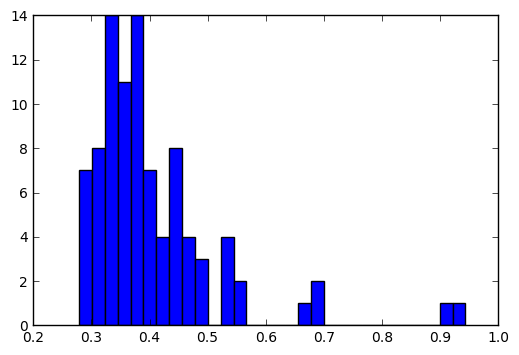

In [12]:
scalers = []
for k, c in enumerate(df_unnormed.columns.values):
    vals1 = df_unnormed[c]
    vals2 = df_normed[c]
    ratios = (vals2 / vals1).dropna().values
    var = np.var(ratios)
    mean = np.mean(ratios)
    scalers.append(mean)
    # assert variance is low
    assert var < 1e-8
plt.hist(scalers, bins=30)

So diffferent scalers for different samples

# Confirm scaled estimate (TPM) is NOT normalized count

In [13]:
bc = 'TCGA-KL-8323-01A-21R-2315-07'
equals = (df_unnormed[bc] == df_normed[bc])
equals.value_counts()

False    17306
True     3225 
Name: TCGA-KL-8323-01A-21R-2315-07, dtype: int64

True values are just those genes that correspond to 0 expression

In [14]:
df_normed[bc].ix[equals].value_counts()

0.0    3225
Name: TCGA-KL-8323-01A-21R-2315-07, dtype: int64